In [6]:
import numpy as np
from scipy.integrate import odeint
from math import factorial
import pylab as pl
%matplotlib inline

In [10]:
lcap = 6e-9
num  = 1
cinf = 55.33
cs   = 5.53e-2
Vm   = 3.29e-5
D    = 3.01e-18
k    = 7.97e-10
N0   = 8.04e21

# Number of terms after which we truncate our expansion:
n = 2

R0   = np.array([2.84984057e-09]) #(1.6 + abs(np.random.randn(num))) * 1e-9
Rinit = np.ones(num)
xinit = (Rinit * R0)**(n+1)
beta = 4 * np.pi * N0 * R0**3 / (3 * Vm)
Da1  = D/(k * R0)

In [11]:
delta_C = cinf - cs * np.exp(lcap/R0)
minarg  = np.argmin(R0**2 / delta_C)
t0      = (R0**2 / (Vm * D * delta_C))[minarg]

kappa = ((R0[minarg] / R0)**2 / delta_C[minarg])

In [15]:
def dx_dt(x, t, Da):
    # Identifies particles which are less than
    csolute = cinf - np.sum(beta * (x**(1/(n+1))/R0)**3) / num
    expapprox = x**(n/n+1)
    for i in range(1, n+1):
        expapprox += lcap**i / factorial(i) * x**((n-i)/(n+1))
    dxdt = (n+1) * kappa * (csolute * x**(n/n+1) - cs * expapprox)/(Da + (x**(1/(n+1))/R0))

    return dxdt

In [16]:
t = np.linspace(0, 10, 1000)

In [17]:
sol1  = odeint(dx_dt, xinit, t, args = (Da1,), rtol = 1e-8, full_output = 1)

/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


In [18]:
sol1[1]['message']

'Integration successful.'

In [10]:
# for time_index, t0 in enumerate(t):
#     print(time_index)
#     pl.hist(R0 * sol1[0][time_index] / 1e-9, 50)
#     pl.xlim([0.8, 7])
#     pl.ylim([0, 4000])    
#     pl.xlabel(r'Size(in nm)')
#     pl.ylabel(r'$N$')
#     pl.title('Time = %3.2f'%(t[time_index]) + r'$\tau$')
#     pl.savefig('images/%04d'%(time_index) + '.png', dpi = 50)
#     pl.clf()

(array([1., 1., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([2.44251776, 2.68532956, 2.92814137, 3.17095318, 3.41376498,
        3.65657679, 3.89938859, 4.1422004 , 4.3850122 , 4.62782401,
        4.87063582]),
 <a list of 10 Patch objects>)

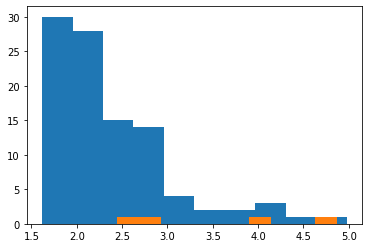

In [11]:
ind  = ((R0 * sol1[0][-1]) / 1e-9 < 1.5)
nind    = np.invert(ind)

pl.hist(R0 * sol1[0][0] / 1e-9)
pl.hist((R0 * sol1[0][-1])[nind] / 1e-9)

In [12]:
surf_energy = np.zeros(t.size)
for time_index, t0 in enumerate(t):
    surf_energy[time_index] = ((R0 * sol1[0][time_index] / 1e-9)**2).mean()

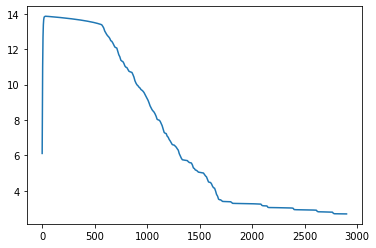

In [13]:
pl.plot(t, surf_energy)

In [19]:
sol1[0][-1].min()

nan

In [21]:
Ravg = np.zeros(t.size)
for time_index, t0 in enumerate(t):
    ind  = ((R0 * sol1[0][time_index]) / 1e-9 < 1.5)
    nind = np.invert(ind)

    Ravg[time_index] = np.mean((R0 * sol1[0][time_index])[nind] / 1e-9)

In [9]:
minarg

0